# Visual Artifact detection

Para este script seguí algunas recomendaciones dadas en este trabajo:

Mercier, M. R., Dubarry, A. S., Tadel, F., Avanzini, P., Axmacher, N., Cellier, D., Vecchio, M. Del, Hamilton, L. S., Hermes, D., Kahana, M. J., Knight, R. T., Llorens, A., Megevand, P., Melloni, L., Miller, K. J., Piai, V., Puce, A., Ramsey, N. F., Schwiedrzik, C. M., … Oostenveld, R. (2022). Advances in human intracranial electroencephalography research, guidelines and good practices. NeuroImage, 260(July), 119438. https://doi.org/10.1016/j.neuroimage.2022.119438

In [1]:
%matplotlib qt5

In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import mne_bids 
import mne_bids.utils 

In [3]:
bids_root = '/home/lfa-01/Documentos/Datos_Proyecto_LFA-ENYS_BIDS'
mne_bids.print_dir_tree(bids_root, max_depth=4)

#Ruta de los datos Derivatives
#deriv_bids_root = '/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS'
#mne_bids.print_dir_tree(deriv_bids_root, max_depth=4)

# Se genera el path para guardar el archivo
#deriv_bids_path = mne_bids.BIDSPath(root=deriv_bids_root, subject = subjects[0], task = tasks[0], session=session, suffix=suffix, datatype=datatype)
#print(deriv_bids_path)



|Datos_Proyecto_LFA-ENYS_BIDS/
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-04/
|------ ses-day1/
|--------- sub-04_ses-day1_scans.tsv
|--------- ieeg/
|------------ sub-04_ses-day1_task-msl_channels.tsv
|------------ sub-04_ses-day1_task-msl_events.tsv
|------------ sub-04_ses-day1_task-msl_ieeg.edf
|------------ sub-04_ses-day1_task-msl_ieeg.json
|------------ sub-04_ses-day1_task-vma_channels.tsv
|------------ sub-04_ses-day1_task-vma_events.tsv
|------------ sub-04_ses-day1_task-vma_ieeg.edf
|------------ sub-04_ses-day1_task-vma_ieeg.json
|--- sub-05/
|------ ses-day1/
|--------- ieeg/
|--- sub-06/
|------ ses-day1/
|--------- sub-06_ses-day1_scans.tsv
|--------- ieeg/
|------------ sub-06_ses-day1_task-msl_channels.tsv
|------------ sub-06_ses-day1_task-msl_events.tsv
|------------ sub-06_ses-day1_task-msl_ieeg.edf
|------------ sub-06_ses-day1_task-msl_ieeg.json
|------------ sub-06_ses-day1_task-vma_channels.tsv
|------------ s

In [4]:
session = 'day1'
datatype = 'ieeg'
subjects = mne_bids.get_entity_vals(bids_root, 'subject')
tasks = mne_bids.get_entity_vals(bids_root, 'task')
suffix = 'ieeg'

print(mne_bids.get_entity_vals(bids_root, 'subject'))
print(mne_bids.get_entity_vals(bids_root, 'task'))
print(mne_bids.get_entity_vals(bids_root, 'session'))
print(mne_bids.get_entity_vals(bids_root, 'run'))

['04', '06', '07']
['msl', 'vma']
['day1']
[]


Elegir el sujeto y tarea que corresponda, para ir evaluando cada registro

In [5]:
idx_sub = 0 # Indice del sujeto analizado
idx_task = 0 # Indice de la tarea

bids_path = mne_bids.BIDSPath(root=bids_root, subject = subjects[idx_sub], task = tasks[idx_task], session=session, suffix=suffix, datatype=datatype)
print(bids_path.match(ignore_json=True))

[BIDSPath(
root: /home/lfa-01/Documentos/Datos_Proyecto_LFA-ENYS_BIDS
datatype: ieeg
basename: sub-04_ses-day1_task-msl_ieeg.edf)]


Se levanta el archivo correspondiente

In [6]:
raw_mne = mne_bids.read_raw_bids(bids_path=bids_path, verbose=False)

/tmp/ipykernel_14085/2145917791.py:1: RuntimeWarning: Did not find any electrodes.tsv associated with sub-04_ses-day1_task-msl.

The search_str was "/home/lfa-01/Documentos/Datos_Proyecto_LFA-ENYS_BIDS/sub-04/**/ieeg/sub-04_ses-day1*electrodes.tsv"
  raw_mne = mne_bids.read_raw_bids(bids_path=bids_path, verbose=False)
/tmp/ipykernel_14085/2145917791.py:1: RuntimeWarning: Did not find any coordsystem.json associated with sub-04_ses-day1_task-msl.

The search_str was "/home/lfa-01/Documentos/Datos_Proyecto_LFA-ENYS_BIDS/sub-04/**/ieeg/sub-04_ses-day1*coordsystem.json"
  raw_mne = mne_bids.read_raw_bids(bids_path=bids_path, verbose=False)


In [7]:
raw_mne.info

<Info | 8 non-empty values
 bads: []
 ch_names: F1P, F1P2, F1P3, F1P4, F1P5, F1M1, F1M2, F1M3, F1M4, F2P1, F2P2, ...
 chs: 52 sEEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2023-03-22 10:23:41 UTC
 nchan: 52
 projs: []
 sfreq: 2000.0 Hz
 subject_info: 3 items (dict)
>

In [8]:
raw_mne.info['ch_names']

['F1P',
 'F1P2',
 'F1P3',
 'F1P4',
 'F1P5',
 'F1M1',
 'F1M2',
 'F1M3',
 'F1M4',
 'F2P1',
 'F2P2',
 'F2P3',
 'F2P4',
 'F2P5',
 'F2M1',
 'F2M2',
 'F2M3',
 'F2M4',
 'F2M5',
 'F2M6',
 'F2M7',
 'F2M8',
 'F2M9',
 'F2M10',
 'F2A',
 'F2A2',
 'F2A3',
 'F2A4',
 'F3P1',
 'F3P2',
 'F3P3',
 'F3M1',
 'F3M2',
 'F3M3',
 'F3M4',
 'F3M5',
 'F3A1',
 'F3A2',
 'F3A3',
 'F3A4',
 'F3A5',
 'F3A6',
 'HIP1',
 'HIP2',
 'HIP3',
 'HIP4',
 'HIP5',
 'HIP6',
 'HIP7',
 'HIP8',
 'chan51',
 'chan52']

Grafico de la senial raw

In [ ]:
seeg_channels = mne.pick_types(raw_mne.info, seeg=True)
raw_mne.plot(duration=60, order=seeg_channels, n_channels=len(seeg_channels),
         remove_dc=False, scalings = 'auto', block=True, color=dict(seeg='b'))

Graficos de densidad de potencia para todos los canales

In [9]:
#raw_mne.plot_psd(tmax=np.inf, fmax=250, average=True)
raw_mne.compute_psd(tmax=np.inf, fmax=1000, method='welch', n_overlap = 250, n_fft = 1000).plot()

Effective window size : 0.500 (s)


ImportError: /home/lfa-01/anaconda3/envs/test_neo/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/lfa-01/anaconda3/envs/test_neo/lib/python3.10/site-packages/scipy/fft/_pocketfft/pypocketfft.cpython-310-x86_64-linux-gnu.so)

Se construyen arbitrariamente epocas de duracion fija 'dur_epoch'

In [10]:
dur_epoch = 5 # duracion de la epoca en segundos
custom_epochs = mne.make_fixed_length_epochs(raw_mne, duration=dur_epoch, preload=False)

Not setting metadata
384 matching events found
No baseline correction applied
0 projection items activated


In [11]:
custom_epochs.info

<Info | 8 non-empty values
 bads: []
 ch_names: F1P, F1P2, F1P3, F1P4, F1P5, F1M1, F1M2, F1M3, F1M4, F2P1, F2P2, ...
 chs: 52 sEEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2023-03-22 10:23:41 UTC
 nchan: 52
 projs: []
 sfreq: 2000.0 Hz
 subject_info: 3 items (dict)
>

In [12]:
custom_epochs.plot_image(picks=['HQU8'])

ValueError: picks (['HQU8']) could not be interpreted as channel names (no channel "['HQU8']"), channel types (no type "HQU8"), or a generic type (just "all" or "data")

Se toma cada epoca de cada canal y se toma una medida de varianza

In [13]:
cant = 0
for i in custom_epochs.iter_evoked():
    cant+=1

    if cant == 1:
        var_chan_x_epoch =  np.var(i.get_data(),1) # se computa la varianza
    else:
        var_chan_x_epoch = np.vstack((var_chan_x_epoch, np.var(i.get_data(),1)))

print(var_chan_x_epoch.shape)

(384, 52)


Se obtiene el maximo de varianza por canal y por epoca

In [14]:
maxVarChann = np.max(var_chan_x_epoch.T,axis=1)
print(maxVarChann.shape)

maxVarEpochs = np.max(var_chan_x_epoch.T,axis=0)
print(maxVarEpochs.shape)

(52,)
(384,)


Grafico compuesto con la varianza de todos los canales x epoca, y el maximo por canal y por epoca

In [15]:
cantCanales = len(maxVarChann)
cantEpochs = len(maxVarEpochs)

## initialize figure and axes
fig = plt.figure()
fig.suptitle('Variance - Channel x Epoch')
gs = fig.add_gridspec(6, 6, hspace=0.2, wspace=0.2)
#
ax_bottom = fig.add_subplot(gs[4:, :4])
ax_bottom.set_xlim([-1,cantEpochs])
ax_bottom.grid()
ax_bottom.set_xlabel('Epoch #')
ax_bottom.set_ylabel('Variance')
#
ax_right = fig.add_subplot(gs[:4, 4:])
ax_right.invert_yaxis()
ax_right.set_ylim([0-1,cantCanales])
ax_right.grid()
ax_right.set_xlabel('Variance')
ax_right.set_yticklabels([])
#
ax_big = fig.add_subplot(gs[:4,:4])
ax_big.set_ylim([-1,cantCanales])
ax_big.set_xlim([-1,cantEpochs])
ax_big.set_ylabel('Channel #')
ax_big.set_xticklabels([])

ax_big.imshow(var_chan_x_epoch.T, aspect='auto')
ax_bottom.plot(np.arange(cantEpochs),maxVarEpochs,'o')
ax_right.plot(maxVarChann,np.arange(cantCanales),'o')
plt.show()

Canales identificados como ruidosos

In [16]:
print(custom_epochs.info['ch_names'][44])
print(custom_epochs.info['ch_names'][13])

HIP3
F2P5


## Filtrado Notch

Filtrado notch para atenuar el ruido de linea y volver a mirar los datos

In [17]:
freqs = [50, 100, 150, 200, 250]
#raw_notch_filt = raw_mne.load_data().copy().notch_filter(freqs=freqs, method='spectrum_fit', filter_length='10s')
raw_notch_filt = raw_mne.load_data().copy().notch_filter(freqs=freqs)

Reading 0 ... 3843999  =      0.000 ...  1921.999 secs...
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 13201 samples (6.601 sec)



ImportError: /home/lfa-01/anaconda3/envs/test_neo/bin/../lib/libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/lfa-01/anaconda3/envs/test_neo/lib/python3.10/site-packages/scipy/fft/_pocketfft/pypocketfft.cpython-310-x86_64-linux-gnu.so)

Grafico de la senial filtrada (notch)

Using matplotlib as 2D backend.


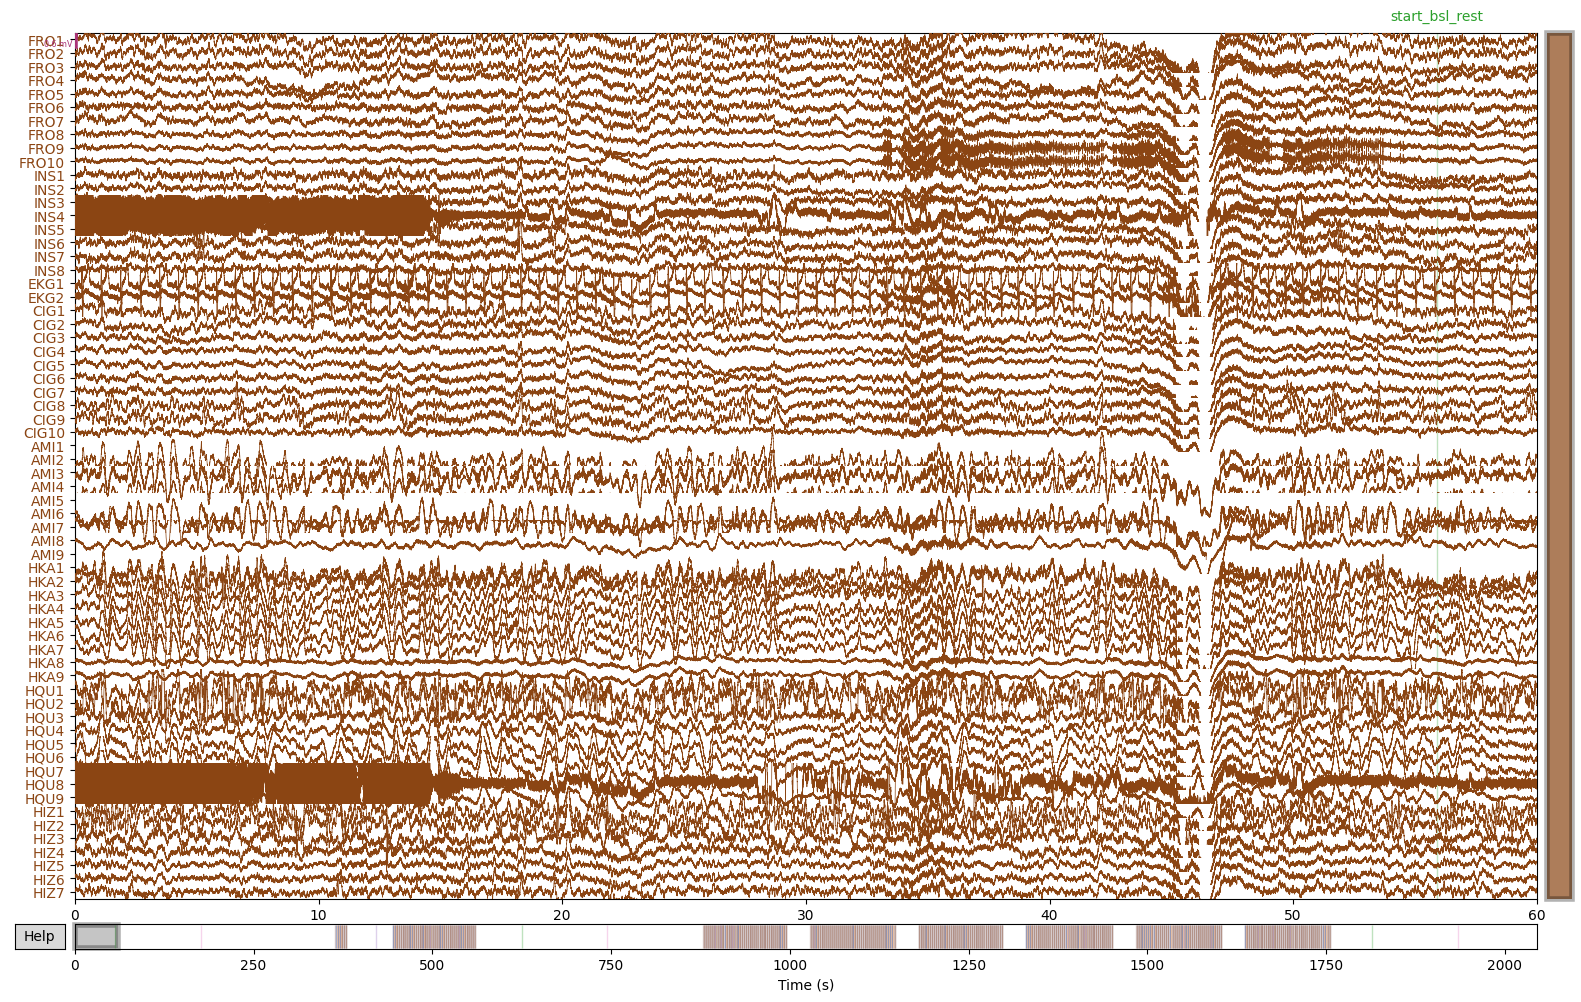

In [23]:
seeg_channels = mne.pick_types(raw_notch_filt.info, seeg=True)
raw_notch_filt.plot(duration=60, order=seeg_channels, n_channels=len(seeg_channels),
         remove_dc=False, scalings = 'auto')

Graficos de densidad de potencia para todos los canales

Effective window size : 0.500 (s)


/tmp/ipykernel_23342/3318743686.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_notch_filt.compute_psd(tmax=np.inf, fmax=1000, method='welch', n_overlap = 500, n_fft = 1000).plot()


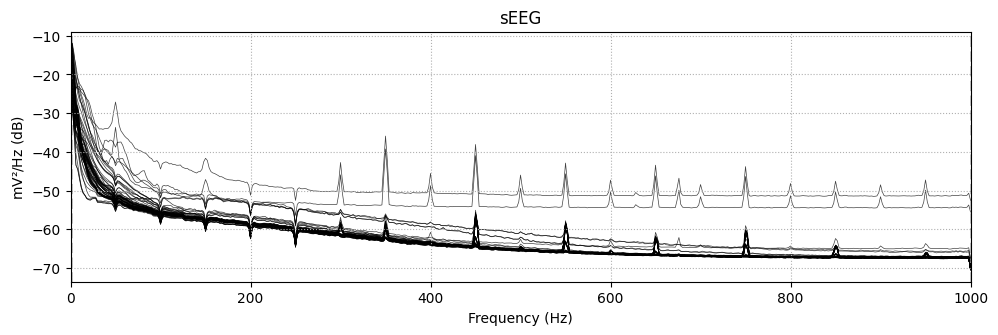

In [19]:
raw_notch_filt.compute_psd(tmax=np.inf, fmax=1000, method='welch', n_overlap = 500, n_fft = 1000).plot()

Se construyen arbitrariamente epocas de duracion fija 'dur_epoch'

In [20]:
dur_epoch = 5 # duracion de la epoca en segundos
custom_epochs_filt = mne.make_fixed_length_epochs(raw_notch_filt, duration=dur_epoch, preload=False)

Not setting metadata
409 matching events found
No baseline correction applied
0 projection items activated


Se toma cada epoca de cada canal y se toma una medida de varianza

In [21]:
cant = 0
for i in custom_epochs_filt.iter_evoked():
    cant+=1

    if cant == 1:
        var_chan_x_epoch_filt =  np.var(i.get_data(),1) # se computa la varianza
    else:
        var_chan_x_epoch_filt = np.vstack((var_chan_x_epoch_filt, np.var(i.get_data(),1)))

maxVarChann_filt = np.max(var_chan_x_epoch_filt.T,axis=1)
print(maxVarChann_filt.shape)

maxVarEpochs_filt = np.max(var_chan_x_epoch_filt.T,axis=0)
print(maxVarEpochs_filt.shape)

(64,)
(409,)


Grafico compuesto con la varianza de todos los canales x epoca, y el maximo por canal y por epoca

In [22]:
cantCanales = len(maxVarChann_filt)
cantEpochs = len(maxVarEpochs_filt)

## initialize figure and axes
fig = plt.figure()
fig.suptitle('Variance - Channel x Epoch - Filtered')
gs = fig.add_gridspec(6, 6, hspace=0.2, wspace=0.2)
#
ax_bottom = fig.add_subplot(gs[4:, :4])
ax_bottom.set_xlim([-1,cantEpochs])
ax_bottom.grid()
ax_bottom.set_xlabel('Epoch #')
ax_bottom.set_ylabel('Variance')
#
ax_right = fig.add_subplot(gs[:4, 4:])
ax_right.invert_yaxis()
ax_right.set_ylim([0-1,cantCanales])
ax_right.grid()
ax_right.set_xlabel('Variance')
ax_right.set_yticklabels([])
#
ax_big = fig.add_subplot(gs[:4,:4])
ax_big.set_ylim([-1,cantCanales])
ax_big.set_xlim([-1,cantEpochs])
ax_big.set_ylabel('Channel #')
ax_big.set_xticklabels([])
#
ax_big.imshow(var_chan_x_epoch_filt.T, aspect='auto')
ax_bottom.plot(np.arange(cantEpochs),maxVarEpochs_filt,'o')
ax_right.plot(maxVarChann_filt,np.arange(cantCanales),'o')
plt.show()

### Marcado de canales con artefactos

Se marcan como 'bad' canales que posiblemente sean artefactuales, para que queden indetnficados en el dataset

In [24]:
print(custom_epochs_filt.info['ch_names'][55])
print(custom_epochs_filt.info['ch_names'][13])

HQU8
INS4


Lineas para informar y dejar regitrado que canales tienen mala señal

In [25]:
bads = ['HQU8', 'INS4']
descriptions = ['Espectro fuera de rango, mas actividad en todas las frecuencias. Mayor varianza respecto a otros canales. En el tiempo se ve ruido cada intervalos.', 
   'Espectro fuera de rango, mas actividad en todas las frecuencias. Mayor varianza respecto a otros canales. En el tiempo se ve ruido cada intervalos.']
mne_bids.mark_channels(bids_path, ch_names=bads, status='bad',descriptions=descriptions, verbose=False)
